In [15]:
from sklearn.model_selection import train_test_split
#To divide the dataset into training and testing set

from sklearn.linear_model import Perceptron
#A linear classifier from sklearn, which implements the perceptron algorithm 
#for binary classification tasks

from sklearn.preprocessing import StandardScaler
#A tool that standardizes features by removing the mean and sacling them to unit variance

from sklearn.metrics import accuracy_score, classification_report
#accuracy_score is a function that calculates the accuracy of predictions

#classification_report provides a detailed report on the precision, recall,and F1-score
#of a classification model.
#1.
file_path = 'diabetes.csv'  # 使用原路径
#导入原来的CSV文件
data = pd.read_csv(file_path)
#赋值给data变量，用pandas数据集，让数据更加容易处理


#2 Prepare the data: features and labels
X = data.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
#X包含了数据集的所有特点，也就是除了outcomes之外的所有列（variable）
#drop方法从数据集中去除outcome列，来用剩下的纵列作为特点

y = data['Outcome']  # Labels (target column 'Outcome')
#Y包含目标标签，（outcome列），指的是一个人是否有糖尿病（1或0的二进制）



#3 Split the data into training and test sets (80% train, 20% test)
#把数据分为训练和测试组，80%训练，20%测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80%的数据训练模型
#20%的数据测试模型的表现
#test_size=0.2：指定保留20％的数据用于测试
#random_state=42：确保可重复性。使用固定的随机种子意味着每次运行代码时数据分割都是相同的。


#4 Standardize the features (Perceptron benefits from standardized data)
scaler = StandardScaler()
#将数据标准化为平均值为 0、标准差为 1，这有助于许多机器学习算法获得更好的性能。
X_train_scaled = scaler.fit_transform(X_train)
#fit_transform(X_train)：将缩放器scaler拟合到训练数据，并通过标准化特征对其进行转换
X_test_scaled = scaler.transform(X_test)
#transform(X_test)：使用相同的缩放参数（从训练集计算）来标准化测试数据。这可确保两组数据都在同一尺度上。

#5 Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=1.0, random_state=42)
#启动perceptron classifier
#把最大迭代设置为1000，如果算法到这个点仍未收敛，则停止。
#eta0=1.0：学习率控制每一步权重的调整程度
perceptron.fit(X_train_scaled, y_train)
#fit使用缩放的训练数据(x_train_scaled)及其相应的标签（Y_train）训练感知模型

#6 Make predictions on the test data
y_pred = perceptron.predict(X_test_scaled)
#使用训练好的模型对测试数据（x_test_scaled）进行预测，得到y_pred包含测试每个样本的预测标签

#7 Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
#accuracy方法通过将预测标签与真实标签进行比较来计算模型的准确率，准确率是正确分类的实例的比利
report = classification_report(y_test, y_pred)
#生成一份详细的报告，包括每个类别，糖尿病非糖尿病的精确度（precision），召回率（recall）和F12分数
#8输出
accuracy, report
#最后一行返回准确性和分类报告
#准确度表示整体准确度的单个值
#报告：模型性能指标详细分类


(0.7272727272727273,
 '              precision    recall  f1-score   support\n\n           0       0.81      0.75      0.78        99\n           1       0.60      0.69      0.64        55\n\n    accuracy                           0.73       154\n   macro avg       0.71      0.72      0.71       154\nweighted avg       0.74      0.73      0.73       154\n')

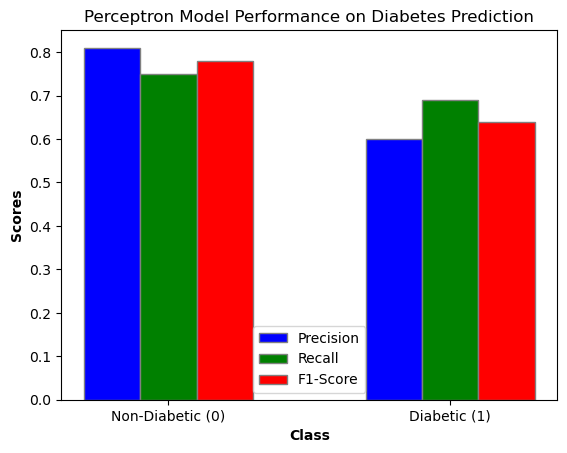

In [2]:
import matplotlib.pyplot as plt

# Data from the classification report (precision, recall, f1-score for classes 0 and 1)
classes = ['Non-Diabetic (0)', 'Diabetic (1)']
#class
precision = [0.81, 0.60]
recall = [0.75, 0.69]
f1_score = [0.78, 0.64]

# Create a bar chart for precision, recall, and f1-score for both classes
fig, ax = plt.subplots()

# Bar width
bar_width = 0.2

# Set position of bar on X axis
r1 = range(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width * 2 for x in r1]

# Create bars for precision, recall, and f1-score
ax.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
ax.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
ax.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels and title
ax.set_xlabel('Class', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Perceptron Model Performance on Diabetes Prediction')
ax.set_xticks([r + bar_width for r in range(len(classes))])
ax.set_xticklabels(classes)

# Add legend
ax.legend()

# Save and show the plot
plt.savefig('perceptron_performance.png')
plt.show()
